In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bank_dataframe = pd.DataFrame(pd.read_csv("bank-additional-full.csv", sep=';'))

# WHOLE DATA

## EXPLORATION

In [23]:
bank_dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


* Consumer confidence is an economic indicator that measures the degree of optimism that consumers feel about the overall state of the economy and their personal financial situation. 
* The 3-month Euribor interest rate is the interest rate at which a selection of European banks lend each other funds denominated in euros and whose loans have a maturity of 3 months.

In [33]:
bank_dataframe.shape

(41188, 21)

In [34]:
bank_dataframe.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [35]:
bank_dataframe.describe(include = "all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [31]:
df_check = bank_dataframe.describe(include = 'all')

df_check.loc['dtype'] = bank_dataframe.dtypes
df_check.loc['size'] = len(bank_dataframe)
df_check.loc['% count'] = bank_dataframe.isnull().mean()

In [32]:
df_check

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.0241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.56759,962.475,0.172963,NaN,0.0818855,93.5757,-40.5026,3.62129,5167.04,NaN
std,10.4212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.77001,186.911,0.494901,NaN,1.57096,0.57884,4.6282,1.73445,72.2515,NaN
min,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,-3.4,92.201,-50.8,0.634,4963.6,NaN
25%,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,999,0,NaN,-1.8,93.075,-42.7,1.344,5099.1,NaN
50%,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,999,0,NaN,1.1,93.749,-41.8,4.857,5191,NaN
75%,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,999,0,NaN,1.4,93.994,-36.4,4.961,5228.1,NaN


Firstly, to lighten the dataset, we are going to create a subset with the customers' information features only

In [57]:
bank_dataframe_customer_info = bank_dataframe[list(bank_dataframe.loc[:, "age" : "loan"]) + ["y"]]

In [58]:
bank_dataframe_customer_info

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


For further use, we are going to create two other subsets with the current and previous campaign data and social and economic data

In [59]:
bank_dataframe_campaign = bank_dataframe.loc[:, "contact" : "poutcome"]

In [60]:
bank_dataframe_se_context = bank_dataframe.loc[:, "emp.var.rate" : "nr.employed"]

In [62]:
bank_dataframe_customer_info.describe(include = "all")

,age,job,marital,education,default,housing,loan,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188
unique,NaN,12,4,8,3,3,3,2
top,NaN,admin.,married,university.degree,no,yes,no,no
freq,NaN,10422,24928,12168,32588,21576,33950,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# SUBSET

## EXPLORATION

In [63]:
bank_dataframe_customer_info.dtypes

age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
y            object
dtype: object

All features, excepting Age, have categorical data. 
We are going to make our analysis on these categorical data on Tableau software later.
So we are going to create an another subset with only numeric data for our data exploration here.

In [69]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
bank_dataframe_eda = bank_dataframe[list(bank_dataframe.select_dtypes(include=numerics)) + ["y"]]

In [71]:
bank_dataframe_eda.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [73]:
bank_dataframe_eda.shape

(41188, 11)

In [77]:
bank_dataframe_eda.dropna().shape

(41188, 11)

No missing values

## ANALYSIS

As explained in the attribute information, "Duration" attribute indicates last contact duration and should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

If Duration is 0, this means the call is not performed. So we are going to filter the lines with 0 Duration.

In [87]:
bank_dataframe_eda = bank_dataframe_eda[bank_dataframe_eda["duration"] != 0]

In [90]:
#4 lines were filtered
bank_dataframe_eda.shape 

(41184, 11)

Most of the customers of this dataset didn't subscribe a term deposit

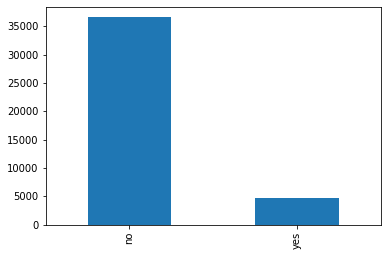

In [92]:
bank_dataframe_eda.y.value_counts().plot(kind="bar")

In [93]:
bank_dataframe_eda.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.910574,220.868980,2.632854,984.112248,0.132388,0.248933,93.603785,-40.593003,3.811564,5176.168991
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Mean age of the customers who subscribed and didn't subscribed is quite the same (40 for the customers who didn't subscribe and 41 for who subscribed).

But the mean duration of the last call is very different (333 seconds of diffrence)

{'whiskers': [<matplotlib.lines.Line2D at 0x188a773af48>,
 'caps': [<matplotlib.lines.Line2D at 0x188a7741c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x188a773ac48>],
 'medians': [<matplotlib.lines.Line2D at 0x188a7747e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x188a7747f08>],
 'means': []}

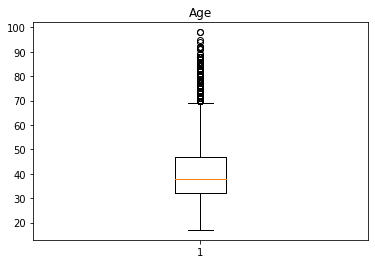

In [95]:
fig1, ax1 = plt.subplots()
ax1.set_title('Age')
ax1.boxplot(bank_dataframe_eda.age)

We can considerate that the customers who are older than 70 are outliersand filter them.

In [96]:
bank_dataframe_eda = bank_dataframe_eda[bank_dataframe_eda["age"] < 70]

Let's check if the filter has an impact on mean values

In [97]:
bank_dataframe_eda.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.660789,220.934731,2.636572,984.694787,0.129518,0.267027,93.607663,-40.619911,3.831236,5177.130395
yes,39.086219,563.664177,2.065626,798.099117,0.475900,-1.178796,93.361899,-39.968205,2.185813,5098.628287


The mean age of the customers subscribed or not subscribed is almost the same, 39 years old.

In [99]:
bank_dataframe_eda.y = np.where(bank_dataframe_eda.y == "yes", 1, 0)

In [106]:
bank_dataframe_eda = bank_dataframe_eda[['age', 'duration', 'campaign', 'pdays', 'previous', 'y']]

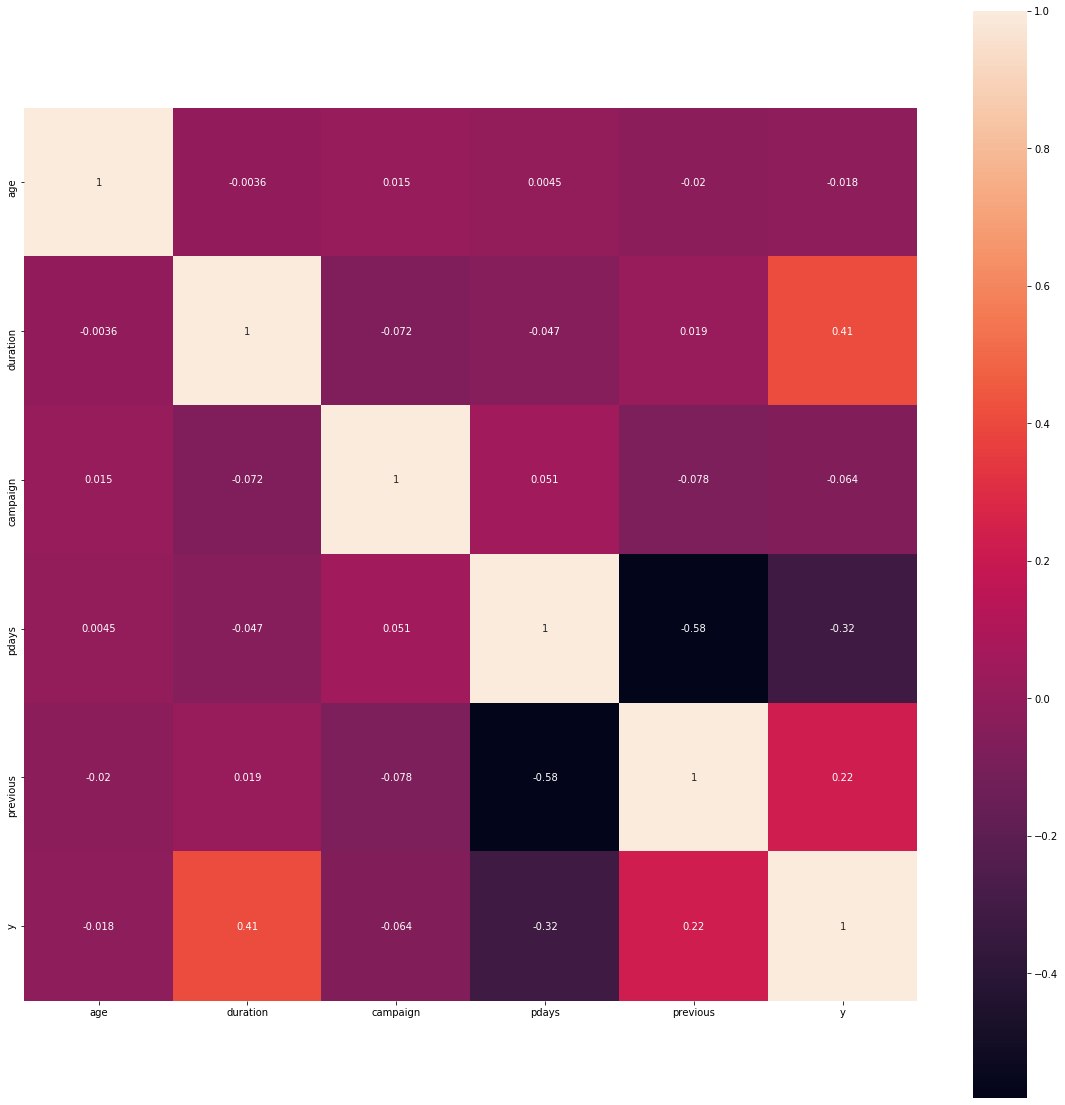

In [108]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(bank_dataframe_eda.corr(), annot=True, square=True)

When the duration of the call increases, the customer tends to subscribe a term deposit